# Data Science Job Salary Prediction

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the data
data=pd.read_csv("ds_salaries.csv")

Data Science Job Salaries Dataset contains 11 columns, each are:

* work_year: The year the salary was paid.
* experience_level: The experience level in the job during the year
* employment_type: The type of employment for the role
* job_title: The role worked in during the year.
* salary: The total gross salary amount paid.
* salary_currency: The currency of the salary paid as an ISO 4217 currency code.
* salaryinusd: The salary in USD
* employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
* remote_ratio: The overall amount of work done remotely
* company_location: The country of the employer's main office or contracting branch
* company_size: The median number of people that worked for the company during the year

## Basic Checks

In [3]:
# First five rows
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
# last five rows
data.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [5]:
# Shape of dataset
data.shape

(3755, 11)

* Dataset contains 11 features with 3755 observations.

In [6]:
# Columns in data
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [7]:
# Statistics of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


In [8]:
# Statistics of data for categorical data
data.describe(include="O")

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,3755,3755,3755,3755,3755,3755,3755
unique,4,4,93,20,78,72,3
top,SE,FT,Data Engineer,USD,US,US,M
freq,2516,3718,1040,3224,3004,3040,3153


In [9]:
# Information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [10]:
data.duplicated().sum()

1171

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data['company_location'][:5]

0    ES
1    US
2    US
3    CA
4    CA
Name: company_location, dtype: object

In [13]:
data['employee_residence'][:5]

0    ES
1    US
2    US
3    CA
4    CA
Name: employee_residence, dtype: object

In [14]:
!pip install country_converter

In [15]:
import country_converter
cc = country_converter.CountryConverter()
data['company_location'] = cc.convert(data['company_location'], to='name_short')
data['employee_residence'] = cc.convert(data['employee_residence'], to='name_short')

In [16]:
data['company_location'][:5]

0            Spain
1    United States
2    United States
3           Canada
4           Canada
Name: company_location, dtype: object

In [17]:
# experience_level
data['experience_level'].value_counts()

SE    1554
MI     664
EN     270
EX      96
Name: experience_level, dtype: int64

In [18]:
data['experience_level'] = data['experience_level'].map({
    'SE': 'Senior',
    'MI': 'Mid',
    'EN': 'Entry',
    'EX': 'Executive'
})

In [19]:
# employment type
data['employment_type'].value_counts()

FT    2547
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64

In [20]:
data['employment_type'] = data['employment_type'].map({
    'FT': 'Full-time',
    'PT': 'Part-time',
    'CT': 'Contract',
    'FL': 'Freelance'
})

In [21]:
# company size
data['company_size'].value_counts()

M    2028
L     409
S     147
Name: company_size, dtype: int64

In [22]:
data['company_size'] = data['company_size'].map({
    'M': 'Medium',
    'L': 'Large',
    'S':'Small'
})

In [23]:
# drop salary and salary_currency features (salary_in_usd is enough to keep on)
data.drop(['salary', 'salary_currency'], axis=1, inplace=True)

In [24]:
# rename salary_in_usd to salary
data.rename(columns={'salary_in_usd': 'salary'}, inplace=True)

In [25]:
# work year
data['work_year'].value_counts()

2023    1156
2022    1125
2021     228
2020      75
Name: work_year, dtype: int64

In [26]:
# remote ratio : 100-fully remote ; 50-Hybrid ; 0-fully onsite
data['remote_ratio'].value_counts()

100    1211
0      1186
50      187
Name: remote_ratio, dtype: int64

In [27]:
# rename remote_ratio to job_type
data.rename(columns={'remote_ratio': 'job_type'}, inplace=True)

In [28]:
# change 100 to remote, 0 to onsite, 50 to hybrid
data['job_type'] = data['job_type'].map({
    100: 'remote',
    0: 'onsite',
    50: 'hybrid',
})

In [29]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,employee_residence,job_type,company_location,company_size
0,2023,Senior,Full-time,Principal Data Scientist,85847,Spain,remote,Spain,Large
1,2023,Mid,Contract,ML Engineer,30000,United States,remote,United States,Small
2,2023,Mid,Contract,ML Engineer,25500,United States,remote,United States,Small
3,2023,Senior,Full-time,Data Scientist,175000,Canada,remote,Canada,Medium
4,2023,Senior,Full-time,Data Scientist,120000,Canada,remote,Canada,Medium


In [30]:
# Various positions offered for a Data Science job
data['job_title'].value_counts()

Data Engineer                598
Data Scientist               538
Data Analyst                 396
Machine Learning Engineer    206
Analytics Engineer            91
                            ... 
Compliance Data Analyst        1
Deep Learning Researcher       1
Staff Data Analyst             1
Data DevOps Engineer           1
Finance Data Analyst           1
Name: job_title, Length: 93, dtype: int64

## Exploratory Data Analysis

Text(0.5, 1.0, 'Salary Distribution')

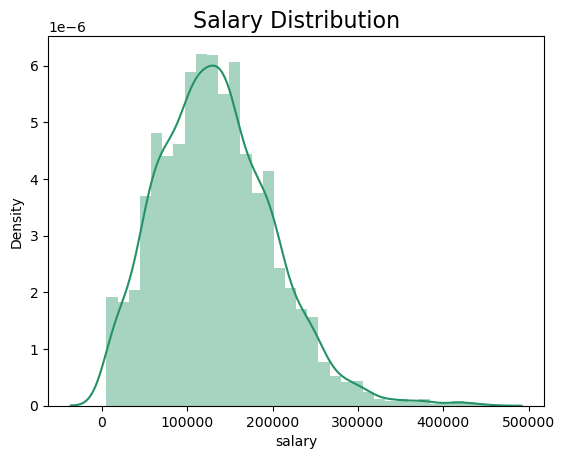

In [31]:
# Salary distribution
sns.set_palette('summer')
ax = sns.distplot(data['salary'])
ax.set_title('Salary Distribution', fontdict={'fontsize': 16})

In [32]:
# mean salary of employees with different experience levels
mean_sal = data.groupby('experience_level')['salary'].mean().sort_values(ascending=False)
mean_sal

experience_level
Executive    191078.208333
Senior       153897.435650
Mid          101828.783133
Entry         72648.685185
Name: salary, dtype: float64

Text(0.5, 1.0, 'Experience Level VS Salary')

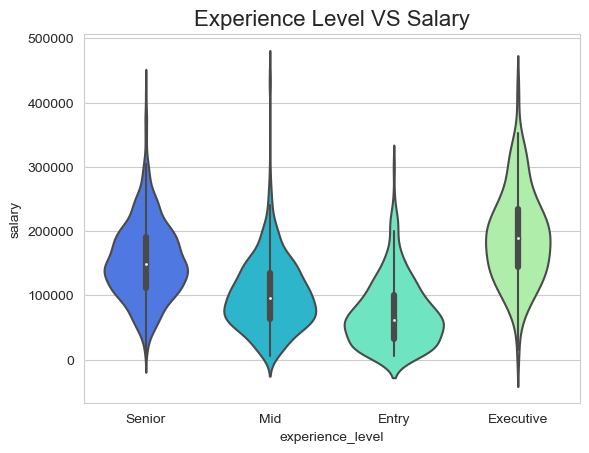

In [33]:
# Salary VS Experience Level
sns.set_palette('rainbow')
sns.set_style('whitegrid')
ax = sns.violinplot(data=data, x='experience_level', y='salary')
ax.set_title('Experience Level VS Salary', fontdict={'fontsize': 16})

In [34]:
# Salary VS Employment Type
# mean salary of employees with different employment types
mean_s_emp_type = data.groupby('employment_type')['salary'].mean().sort_values(ascending=False)
mean_s_emp_type

employment_type
Full-time    134434.613271
Contract     113446.900000
Freelance     51807.800000
Part-time     39533.705882
Name: salary, dtype: float64

Text(0.5, 1.0, 'Employment Type VS Salary')

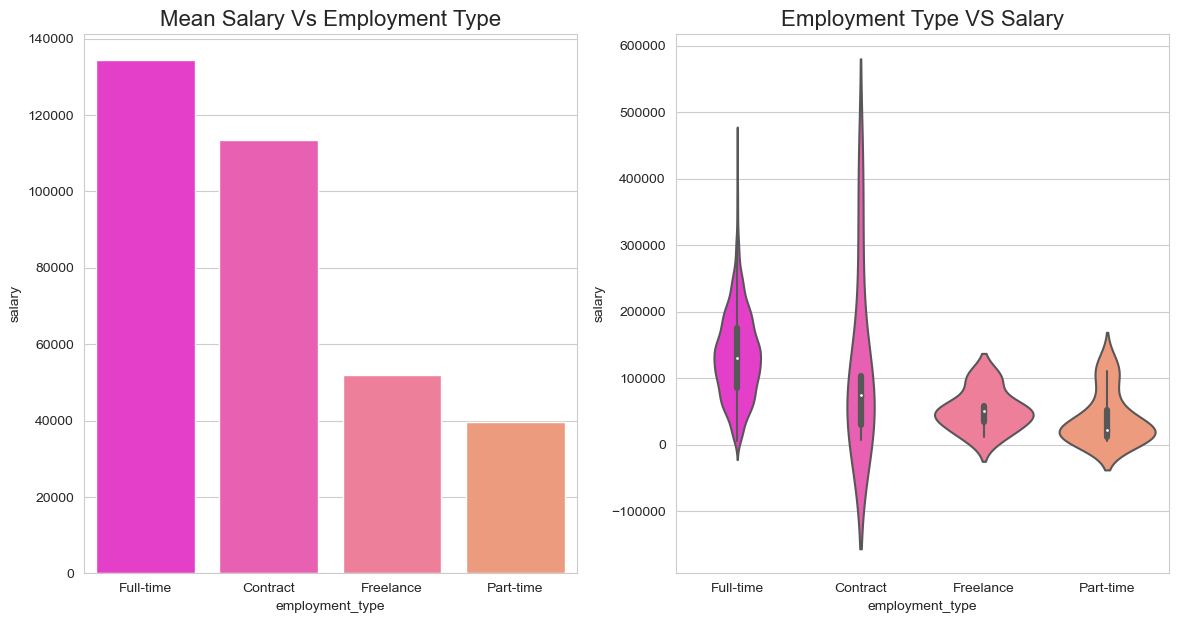

In [35]:
plt.figure(figsize=(14, 7))
sns.set_palette('spring')

plt.subplot(1, 2, 1)
ax = sns.barplot(x=mean_s_emp_type.index, y=mean_s_emp_type)
ax.set_title('Mean Salary Vs Employment Type', fontdict={'fontsize': 16})

plt.subplot(1, 2, 2)
ax = sns.violinplot(data=data, x='employment_type', y='salary')
ax.set_title('Employment Type VS Salary', fontdict={'fontsize': 16})

In [36]:
# mean salary of employees from different company sizes
mean_s_cmp_size = data.groupby('company_size')['salary'].mean().sort_values(ascending=False)
mean_s_cmp_size

company_size
Medium    141474.514300
Large     113202.239609
Small      78364.278912
Name: salary, dtype: float64

Text(0.5, 1.0, 'Company Size VS Salary')

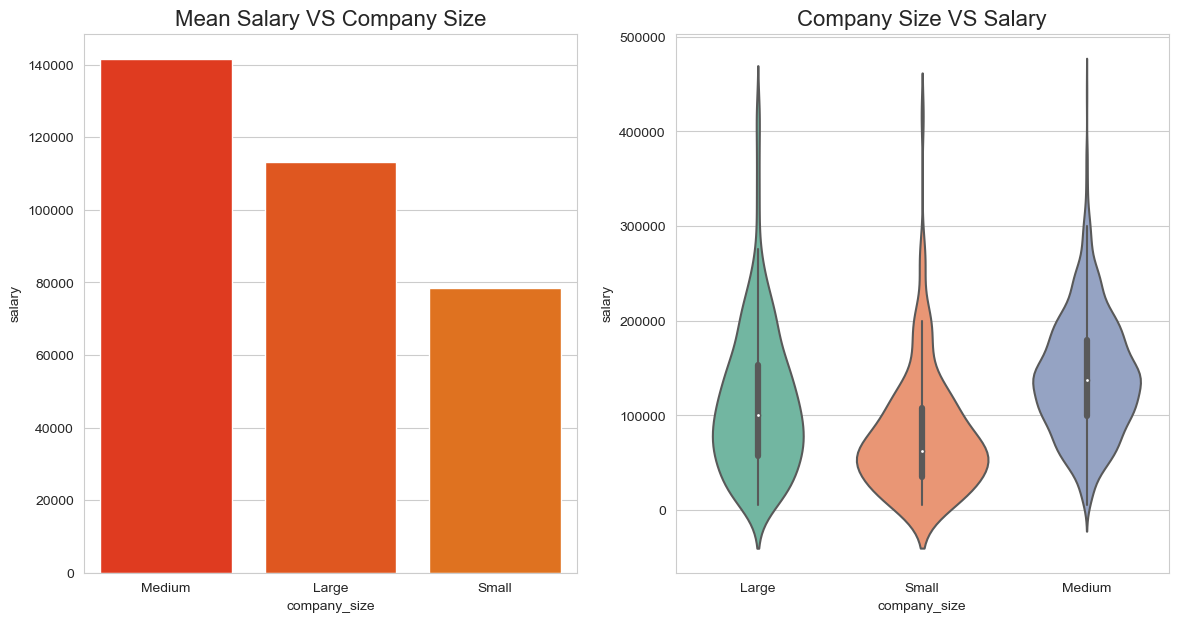

In [37]:
# Salary VS Company Size
plt.figure(figsize=(14, 7))
sns.set_palette('autumn')

plt.subplot(1, 2, 1)
ax = sns.barplot(x=mean_s_cmp_size.index, y=mean_s_cmp_size)
ax.set_title('Mean Salary VS Company Size', fontdict={'fontsize': 16})

plt.subplot(1, 2, 2)
sns.set_palette('Set2')
ax = sns.violinplot(data=data, x='company_size', y='salary')
ax.set_title('Company Size VS Salary', fontdict={'fontsize': 16})

In [38]:
# mean salary of employees with different job types
mean_s_jtype = data.groupby('job_type')['salary'].mean().sort_values(ascending=False)
mean_s_jtype

job_type
onsite    143690.173693
remote    131821.666391
hybrid     78486.609626
Name: salary, dtype: float64

Text(0.5, 1.0, 'Job Type VS Salary')

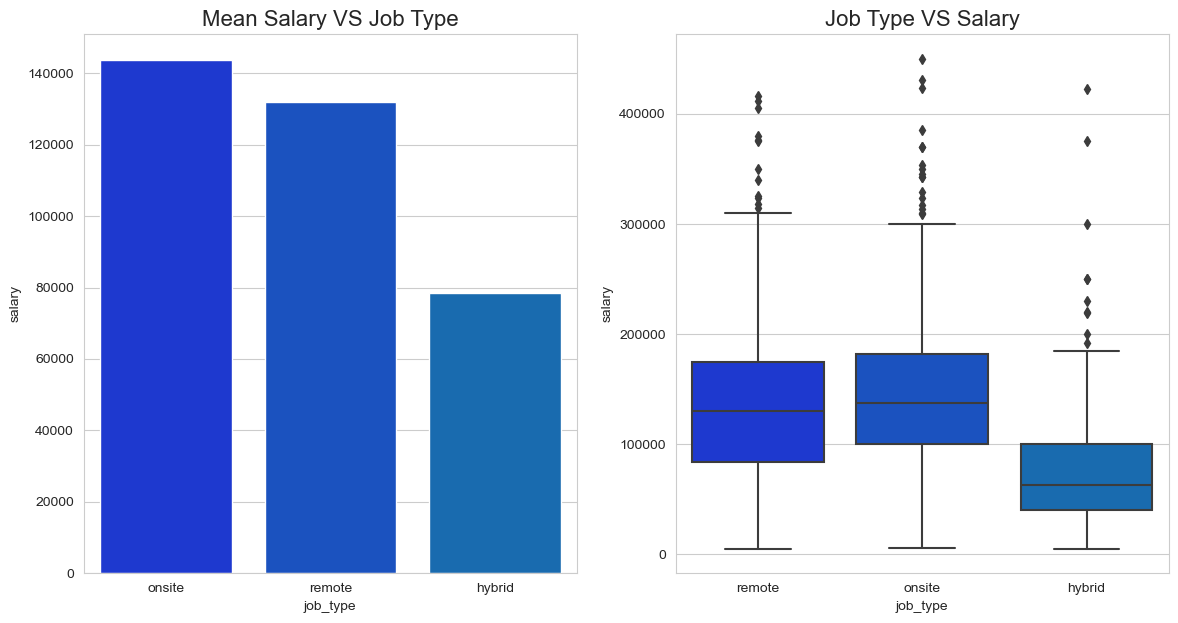

In [39]:
# Salary VS Job Type
plt.figure(figsize=(14, 7))
sns.set_palette('winter')

plt.subplot(1, 2, 1)
ax = sns.barplot(x=mean_s_jtype.index, y=mean_s_jtype)
ax.set_title('Mean Salary VS Job Type', fontdict={'fontsize': 16})

plt.subplot(1, 2, 2)
ax = sns.boxplot(data=data, x='job_type', y='salary')
ax.set_title('Job Type VS Salary', fontdict={'fontsize': 16})

Text(0.5, 1.0, 'Company Size VS Job Types Counts')

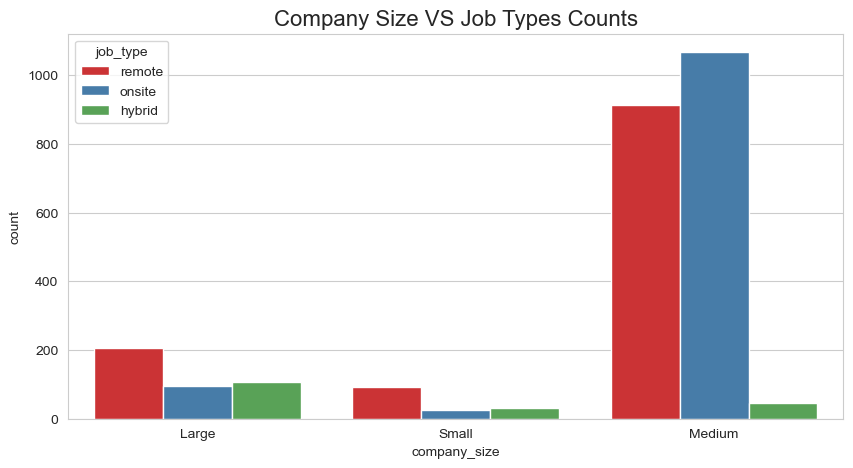

In [40]:
# Company Size VS Job Type Counts
plt.figure(figsize=(10, 5))
sns.set_palette('Set1')
ax = sns.countplot(data=data, x='company_size', hue='job_type')
ax.set_title('Company Size VS Job Types Counts', fontdict={'fontsize': 16})

Text(0.5, 1.0, 'Job Type & Company Size VS Salary')

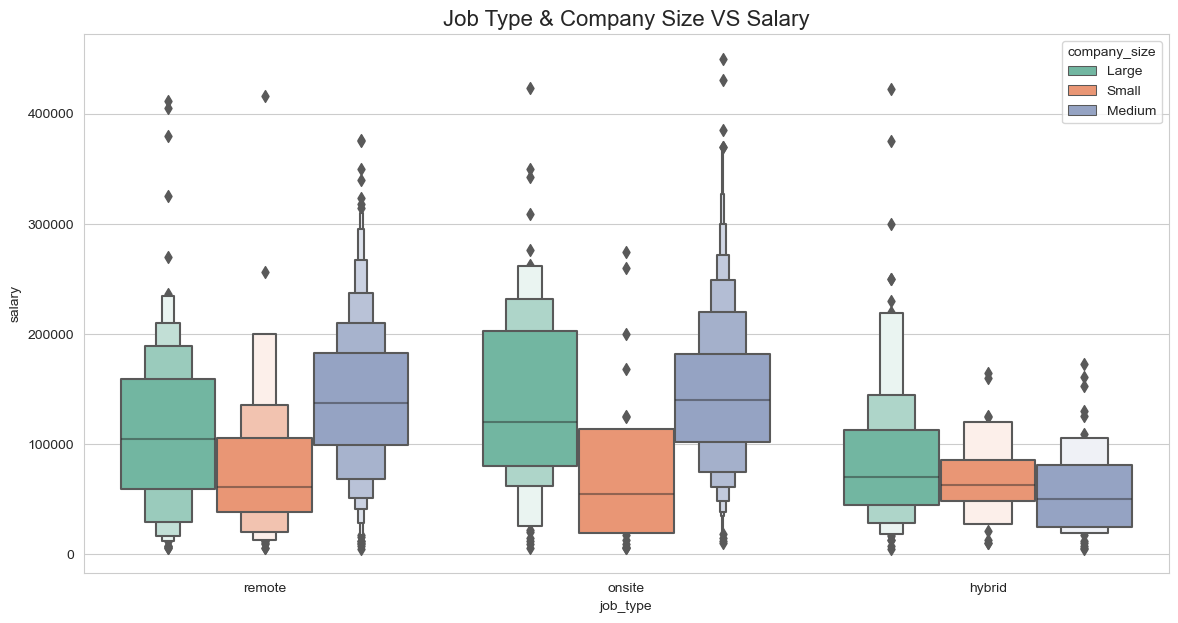

In [41]:
# job type and company size VS salary
plt.figure(figsize=(14, 7))
sns.set_palette('Set2')
ax = sns.boxenplot(data=data, x='job_type', y='salary', hue='company_size')
ax.set_title('Job Type & Company Size VS Salary', fontdict={'fontsize': 16})

Text(0, 0.5, '')

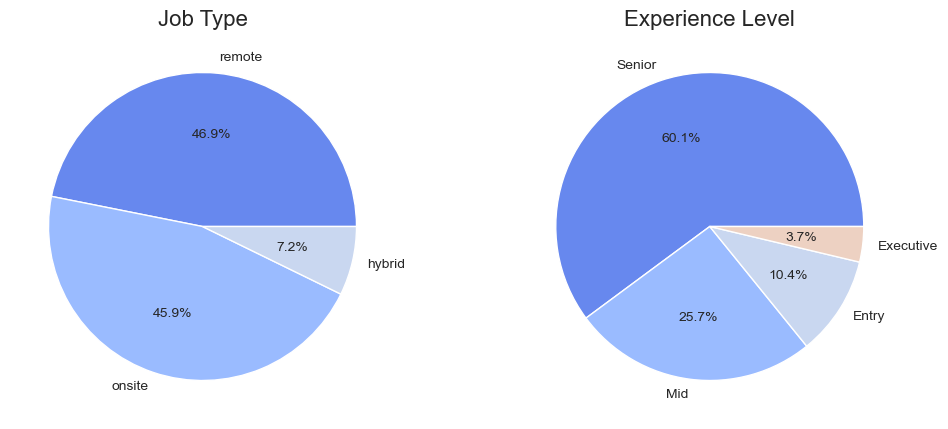

In [42]:
# Job Types and Experience Level distributions
plt.figure(figsize=(12, 5))
sns.set_palette('coolwarm')

# job types
plt.subplot(1,2,1)
ax = data['job_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
ax.set_title('Job Type', fontdict={'fontsize': 16})
ax.set_ylabel('')

# experience levels
plt.subplot(1,2,2)
ax = data['experience_level'].value_counts().plot(kind='pie', autopct='%1.1f%%')
ax.set_title('Experience Level', fontdict={'fontsize': 16})
ax.set_ylabel('')

In [43]:
# top 10 data science roles according to mean salary
top_ds_roles = data.groupby('job_title')['salary'].mean().sort_values(ascending=False)

# ignore those ds roles which occur only once
top_ds_roles_ =  pd.Series(data=list(top_ds_roles.index)).apply(lambda x: x if list(data['job_title']).count(x) > 1 else 0)
top_ds_roles_that_happened_gt_1 = top_ds_roles_[top_ds_roles_ != 0][:10]
top_ds_roles_that_happened_gt_1 = top_ds_roles[top_ds_roles_that_happened_gt_1]
top_ds_roles_that_happened_gt_1

job_title
Data Lead                             212500.000000
Data Analytics Lead                   211254.500000
Principal Data Scientist              198171.125000
Director of Data Science              195140.727273
Principal Data Engineer               192500.000000
Machine Learning Software Engineer    192420.000000
Applied Scientist                     190342.580645
Head of Data                          183857.500000
Data Science Manager                  181930.173077
Data Infrastructure Engineer          175051.666667
Name: salary, dtype: float64

Text(0.5, 1.0, 'Top 10 data science roles with highest number of openings')

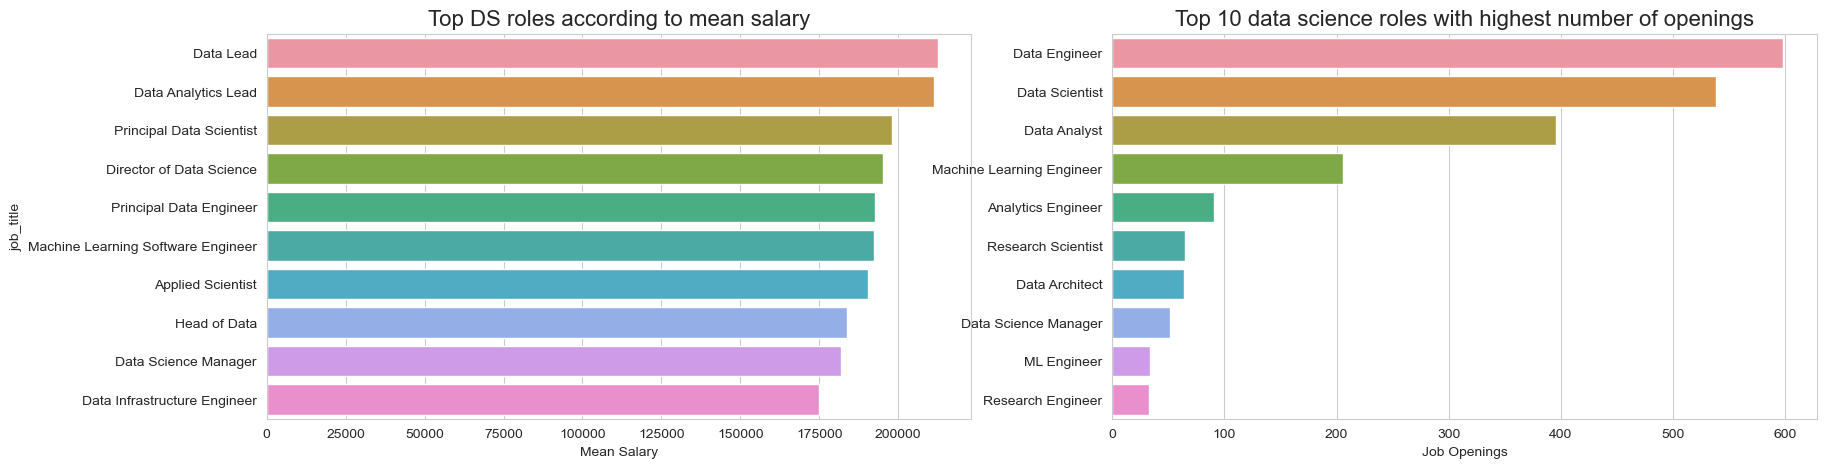

In [44]:
plt.figure(figsize=(20, 5))

# top 10 data science roles according to mean salary
plt.subplot(1, 2, 1)
ax = sns.barplot(y=top_ds_roles_that_happened_gt_1.index, x=top_ds_roles_that_happened_gt_1)
ax.set_xlabel('Mean Salary')
ax.set_title('Top DS roles according to mean salary', fontdict={'fontsize': 16})

# top 10 data science roles with highest number of openings
plt.subplot(1, 2, 2)
top_dr = data['job_title'].value_counts()[:10]

ax = sns.barplot(x=top_dr, y=top_dr.index)
ax.set_xlabel('Job Openings')
ax.set_title('Top 10 data science roles with highest number of openings', fontdict={'fontsize': 16})

Text(0.5, 1.0, 'Top 10 countries having most DS job opportunities')

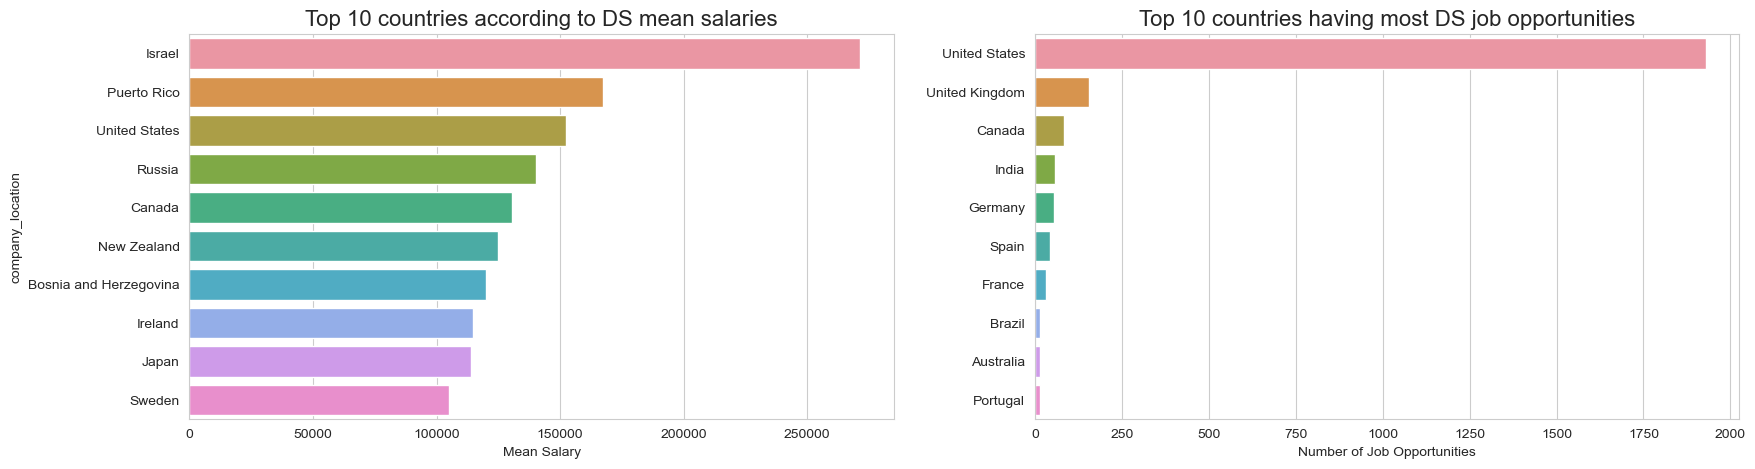

In [45]:
# top 10 company-locations according to mean salary
top_cmp_locations = data.groupby('company_location')['salary'].mean().sort_values(ascending=False)[:10]
plt.figure(figsize=(20, 5))

# top 10 company-locations according to mean salary
plt.subplot(1, 2, 1)
ax = sns.barplot(y=top_cmp_locations.index, x=top_cmp_locations)
ax.set_xlabel('Mean Salary')
ax.set_title('Top 10 countries according to DS mean salaries', fontdict={'fontsize': 16})

# top 10 company-locations having most job opportunities
top_cl = data['company_location'].value_counts()[:10]
plt.subplot(1, 2, 2)
ax = sns.barplot(x=top_cl, y=top_cl.index)
ax.set_xlabel('Number of Job Opportunities')
ax.set_title('Top 10 countries having most DS job opportunities', fontdict={'fontsize': 16})

In [46]:
# top 10 employee-residence according to mean salary
top_emp_residence = data.groupby('employee_residence')['salary'].mean().sort_values(ascending=False)[:10]

Text(0.5, 0, 'Job Openings')

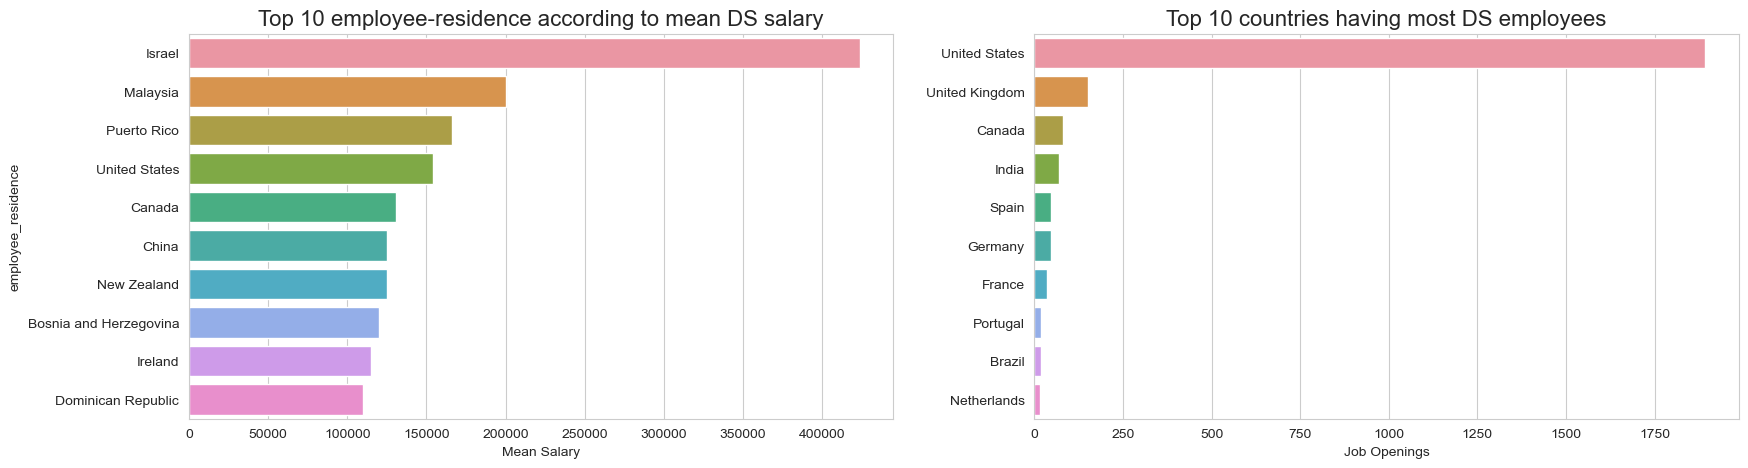

In [47]:
plt.figure(figsize=(20, 5))

# top 10 employee-residence according to mean salary
plt.subplot(1,2,1)
ax = sns.barplot(y=top_emp_residence.index, x=top_emp_residence)
ax.set_xlabel('Mean Salary')
ax.set_title('Top 10 employee-residence according to mean DS salary', fontdict={'fontsize': 16})

# top 10 employee-residence according to number of job openings
plt.subplot(1,2,2)
top_er = data['employee_residence'].value_counts()[:10]
ax = sns.barplot(x=top_er, y=top_er.index)
ax.set_title('Top 10 countries having most DS employees', fontdict={'fontsize': 16})
ax.set_xlabel('Job Openings')

## Data Preprocessing

In [48]:
#Check the missing value
check_missing = data.isnull().sum() * 100 / data.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

In [49]:
#Check the number of unique value on object datatype
data.select_dtypes(include='object').nunique()

experience_level       4
employment_type        4
job_title             93
employee_residence    78
job_type               3
company_location      72
company_size           3
dtype: int64

#### Categorize the Job Title

In [50]:
data.job_title.unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

#### Label Encoding for Object datatype

In [51]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in data.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {data[col].unique()}")

experience_level: ['Senior' 'Mid' 'Entry' 'Executive']
employment_type: ['Full-time' 'Contract' 'Freelance' 'Part-time']
job_title: ['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Autonomous Vehicle Technician' 'Applied Machine Learning Scient

In [52]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in data.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(data[col].unique())
    
    # Transform the column using the encoder
    data[col] = label_encoder.transform(data[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {data[col].unique()}")

experience_level: [3 2 0 1]
employment_type: [2 0 1 3]
job_title: [84 66 47  8 25 38 88  4 18 69 50 33 23 41 22 31  6  1 89 29 17  5 91 55
 32 58 45 37 73 16 49 62 13 53 74 67  3  9  7 64 21 57 34 90  2 40 14 44
 52 11 42 30 70 12 59 61 51 75 15 86 24 10 78 28 35 43 72 79 76 68  0 85
 27 26 36 46 48 20 39 77 80 87 82 71 65 54 19 63 60 81 83 92 56]
employee_residence: [66 75 11 26 74 53 32 30 58 51 68 12 25  4 24 72 36 37 27  5 15 63 67 65
 48 76  9 69 17 57 42 77 18  2  3  8 41 28 54 43 60 55 38 50 44  6  1 34
 31 64 14 19 16 71 13 59 20  7 56 21 22 33 73 46 39 23 29 70 61  0 35 10
 40 62 52 49 45 47]
job_type: [2 1 0]
company_location: [62 70 12 25 69 50 31 29 48 64 13 24 23 67 35 36 26 16 59  5 63 61 45 11
 55 58 65 18 71 22  4 10 39 27 51 40 57 52 37 47 54  0  3 41  2 17 33  7
 30  6 60 19 66 56 20  9 53  8 32 21 68 42 43 28 38  1 34 15 49 14 46 44]
company_size: [0 2 1]


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 0 to 3754
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   work_year           2584 non-null   int64
 1   experience_level    2584 non-null   int32
 2   employment_type     2584 non-null   int32
 3   job_title           2584 non-null   int32
 4   salary              2584 non-null   int64
 5   employee_residence  2584 non-null   int32
 6   job_type            2584 non-null   int32
 7   company_location    2584 non-null   int32
 8   company_size        2584 non-null   int32
dtypes: int32(7), int64(2)
memory usage: 131.2 KB


* All of the data are categorial so that means, there are no outliers

## Feature Engineering

In [54]:
#Checking redundant features
data.describe()

,work_year,experience_level,employment_type,job_title,salary,employee_residence,job_type,company_location,company_size
count,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000
mean,2022.301084,2.355263,1.994969,40.438854,133409.280186,66.344814,1.396285,62.506966,0.898607
std,0.749179,0.964702,0.160977,20.016121,67136.837329,19.207103,0.619781,17.266285,0.452735
min,2020.000000,0.000000,0.000000,0.000000,5132.000000,0.000000,0.000000,0.000000,0.000000
25%,2022.000000,2.000000,2.000000,25.000000,84975.000000,74.000000,1.000000,69.000000,1.000000
50%,2022.000000,3.000000,2.000000,33.000000,130000.000000,75.000000,1.000000,70.000000,1.000000
75%,2023.000000,3.000000,2.000000,47.000000,175000.000000,75.000000,2.000000,70.000000,1.000000
max,2023.000000,3.000000,3.000000,92.000000,450000.000000,77.000000,2.000000,71.000000,2.000000


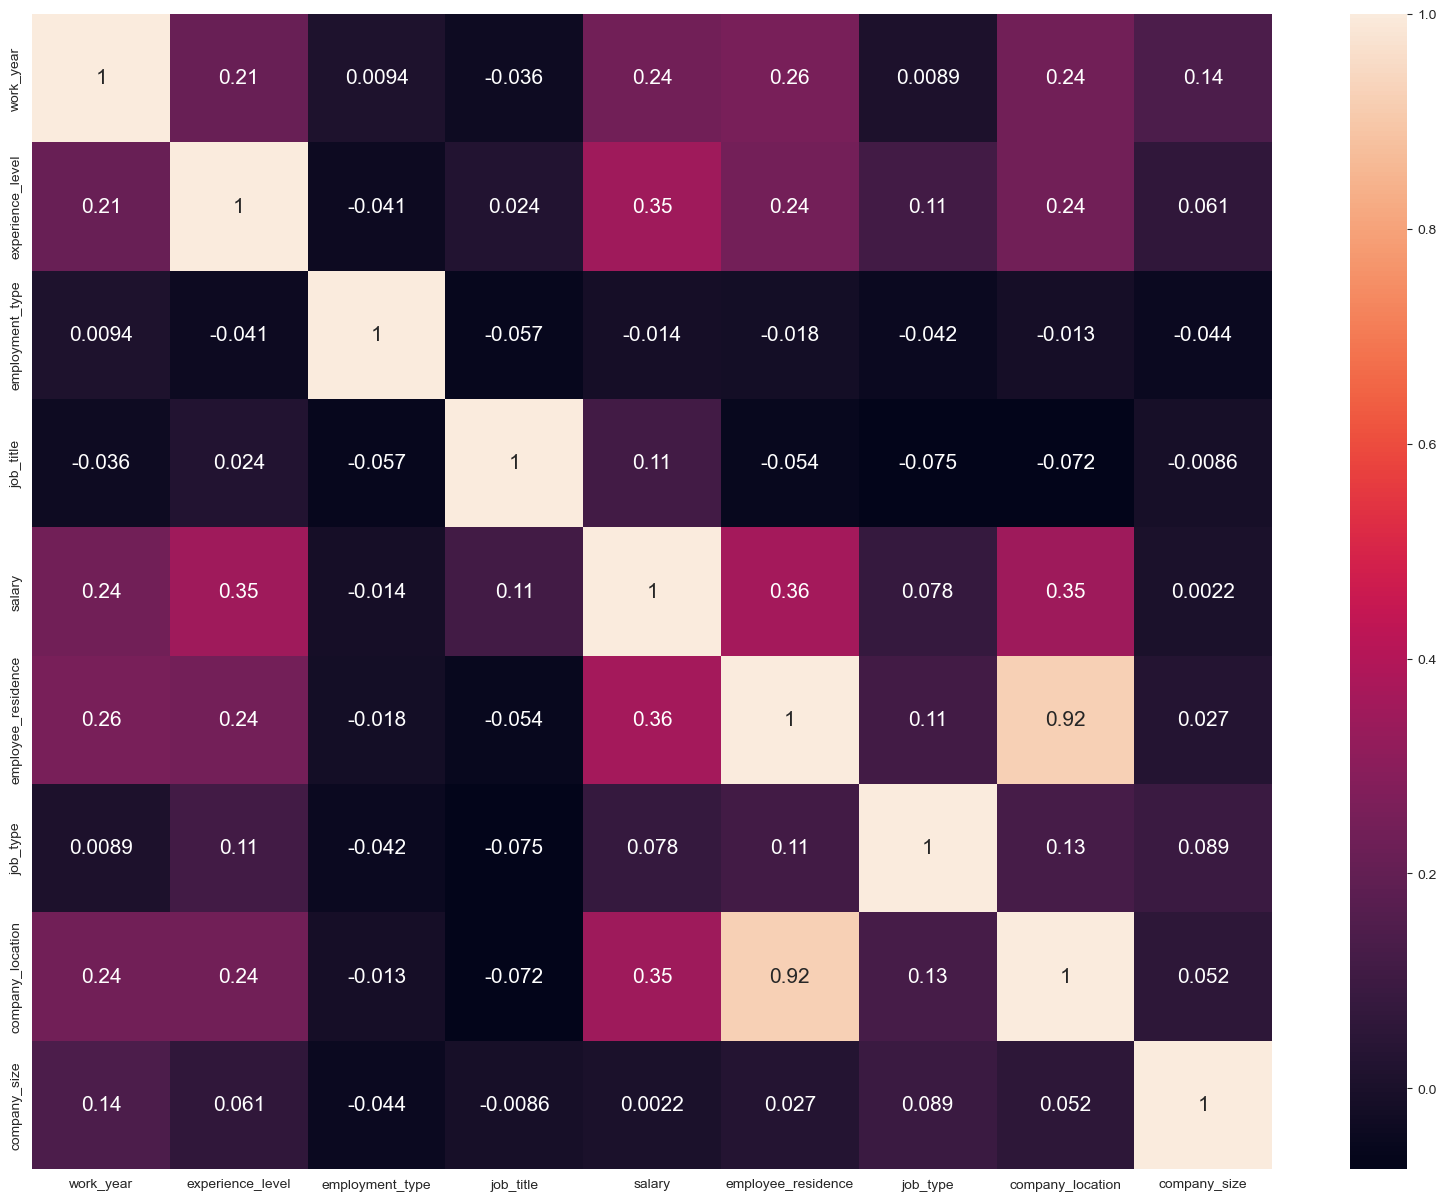

In [55]:
#Correlation Heatmap
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True,annot_kws={"size":15})
plt.show()

### Model Building

In [56]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'employee_residence', 'job_type', 'company_location',
       'company_size'],
      dtype='object')

In [57]:
# Defining x & y
x = data.drop('salary',axis=1)
y = data.salary

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [59]:
print("x train shape :",x_train.shape)
print("x test shape :",x_test.shape)
print("y train shape :",y_train.shape)
print("x test shape :",y_test.shape)

x train shape : (2067, 8)
x test shape : (517, 8)
y train shape : (2067,)
x test shape : (517,)


### Decision Tree Regressor

In [60]:
from sklearn.metrics import r2_score,accuracy_score,mean_absolute_error,mean_squared_error
import math

In [61]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [62]:
y_pred_dt = dt.predict(x_test)

In [63]:
print('Decision Tree R-squared:', r2_score(y_test, y_pred_dt))
print('Decision Tree Mean Absolute Error:', mean_absolute_error(y_test, y_pred_dt))
print('Decision Tree Mean Squared Error:', mean_squared_error(y_test, y_pred_dt))
print('Decision Tree Root Mean Squared Error:', math.sqrt(mean_squared_error(y_test, y_pred_dt)))

Decision Tree R-squared: 0.18044968902435632
Decision Tree Mean Absolute Error: 43435.10745667598
Decision Tree Mean Squared Error: 3584771970.1508923
Decision Tree Root Mean Squared Error: 59872.96526940095


### Random Forest Regressor

In [64]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [65]:
y_pred_rf = rf.predict(x_test)

In [66]:
print('Random Forest R-squared:', r2_score(y_test, y_pred_rf))
print('Random Forest Mean Absolute Error:', mean_absolute_error(y_test, y_pred_rf))
print('Random Forest Mean Squared Error:', mean_squared_error(y_test, y_pred_rf))
print('Random Forest Root Mean Squared Error:', math.sqrt(mean_squared_error(y_test, y_pred_rf)))

Random Forest R-squared: 0.31614888609684444
Random Forest Mean Absolute Error: 40078.47623606114
Random Forest Mean Squared Error: 2991213927.9870906
Random Forest Root Mean Squared Error: 54691.99144287114


### Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [68]:
y_pred_lr = lr.predict(x_test)

In [69]:
print('Linear Regression R-squared:', r2_score(y_test, y_pred_lr))
print('Linear Regression Mean Absolute Error:', mean_absolute_error(y_test, y_pred_lr))
print('Linear Regression Mean Squared Error:', mean_squared_error(y_test, y_pred_lr))
print('Linear Regression Root Mean Squared Error:', math.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linear Regression R-squared: 0.25168520506845915
Linear Regression Mean Absolute Error: 45135.64622215387
Linear Regression Mean Squared Error: 3273182702.5071106
Linear Regression Root Mean Squared Error: 57211.73570612161


In [70]:
data = [{'Model': 'Linear Regression', 'r2_score': r2_score(y_test,y_pred_lr),'Mean Absolute Error':mean_absolute_error(y_test, y_pred_lr),
                'Mean Squared Error':mean_squared_error(y_test, y_pred_lr),'Root Mean Squared Error':math.sqrt(mean_squared_error(y_test, y_pred_lr))},
         {'Model': 'Decision Tree', 'r2_score': r2_score(y_test,y_pred_dt),'Mean Absolute Error':mean_absolute_error(y_test, y_pred_dt),
                'Mean Squared Error':mean_squared_error(y_test, y_pred_dt),'Root Mean Squared Error':math.sqrt(mean_squared_error(y_test, y_pred_dt))},
         {'Model': 'Random Forest', 'r2_score': r2_score(y_test,y_pred_rf),'Mean Absolute Error':mean_absolute_error(y_test, y_pred_rf),
                'Mean Squared Error':mean_squared_error(y_test, y_pred_rf),'Root Mean Squared Error':math.sqrt(mean_squared_error(y_test, y_pred_rf))}]
  
data = pd.DataFrame.from_dict(data)
  
data

,Model,r2_score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Linear Regression,0.251685,45135.646222,3.273183e+09,57211.735706
1,Decision Tree,0.180450,43435.107457,3.584772e+09,59872.965269
2,Random Forest,0.316149,40078.476236,2.991214e+09,54691.991443
